In [ ]:
# @title Default title text
from IPython.display import display, HTML

In [ ]:
# @title Default title text
title = "Translation of Star Wars Dialogues"

# Display the title in bold and with a larger font size
display(HTML(f"<h1 style='font-size: 100px; font-weight: bold;'>{title}</h1>"))

# Load Libraries

In [ ]:
import string
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import LSTM, Input, TimeDistributed, Dense, Activation, RepeatVector, Embedding
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

# Importing the visualization libraries
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud




# Load Dataset

*   Dataset from Kaggle having scripts of StarWars movie with the transalations of each dialogue into its Russian and Hindi respectlively.
*   The Russian translation is written in *'Cyrillic'* script and Hindi is written in *'Devanagari'* script.
*   Checking the initial 10 cells in the dataset by using **'dataset.head(10)'**

In [ ]:
df = pd.read_csv("/content/translated_dataset.csv")

In [ ]:
df.head(10)

,line,character,dialogue,Russian,Hindi
0,1,THREEPIO,Did you hear that? They've shut down the main...,Ты это слышал?Они закрыли главный реактор.Мы б...,आपको लगता है कि सुना?उन्होंने मुख्य रिएक्टर को...
1,2,THREEPIO,We're doomed!,Мы обречены!,हम बर्बाद हो रहे हैं!
2,3,THREEPIO,There'll be no escape for the Princess this time.,На этот раз не будет спасения для принцессы.,इस बार राजकुमारी के लिए कोई पलायन नहीं होगा।
3,4,THREEPIO,What's that?,Что это такое?,वह क्या है?
4,5,THREEPIO,I should have known better than to trust the l...,"Я должен был знать лучше, чем доверять логике ...",मुझे एक आधे आकार के थर्मोकैप्सुलरी डीहाउसिंग ए...
5,6,LUKE,Hurry up! Come with me! What are you waiting...,Торопиться!Пойдем со мной!Чего же ты ждешь?!За...,जल्दी करो!मेरे साथ आइए!आप किस का इंतजार कर रहे...
6,7,THREEPIO,"Artoo! Artoo-Detoo, where are you?","Арту!Artoo-detoo, где ты?","Artoo!Artoo-Detoo, आप कहाँ हैं?"
7,8,THREEPIO,At last! Where have you been?,Наконец!Где ты был?,आखिरकार!आप कहां थे?
8,9,THREEPIO,They're heading in this direction. What are we...,Они идут в этом направлении.Что мы будем делат...,वे इस दिशा में जा रहे हैं।हम क्या करने जा रहे ...
9,10,THREEPIO,"Wait a minute, where are you going?","Подожди минутку, куда ты идешь?","एक मिनट रुको, तुम कहाँ जा रहे हो?"


In [ ]:
# @title Default title text
title = "Pre-Processing"

# Display the title in larger font, bold, and centered
display(HTML(f"<h1 style='font-size: 40px; font-weight: bold; text-align: center;'>{title}</h1>"))


### Checking for Null Values
#### **'.isnull()'** fuction is used to check if there is any missing value in the dataset.

In [ ]:
df.isnull().sum()

line         0
character    0
dialogue     0
Russian      2
Hindi        7
dtype: int64

#### 'df[df.isnull().any(axis=1)]' is used to find if there is any NaN values in any column.

In [ ]:
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)

      line character                                           dialogue  \
1145   136     OZZEL                                       Yes, Captain   
1148   139     PIETT                The visuals indicate life readings.   
1149   140     OZZEL  It could mean anything. If we followed every l...   
1150   141     PIETT  But, sir, the Hoth system is supposed to be de...   
1170   161     VADER                               What is it, General?   
2087   239       BEN                    You cannot escape your destiny.   
2094   246      LUKE                        I can't kill my own father.   
2117   269       HAN                              You're gonna need it.   
2249   401      LUKE         Do you understand anything they're saying?   

                                                Russian  \
1145                                        Да, капитан   
1148       Визуальные эффекты указывают на жизнь жизни.   
1149  Это может означать что угодно.Если мы следовал...   
1150         

In [ ]:
null_rows = df.isnull().any(axis=1)

In [ ]:
print("Rows with null values:")
print(df[null_rows])

Rows with null values:
      line character                                           dialogue  \
1145   136     OZZEL                                       Yes, Captain   
1148   139     PIETT                The visuals indicate life readings.   
1149   140     OZZEL  It could mean anything. If we followed every l...   
1150   141     PIETT  But, sir, the Hoth system is supposed to be de...   
1170   161     VADER                               What is it, General?   
2087   239       BEN                    You cannot escape your destiny.   
2094   246      LUKE                        I can't kill my own father.   
2117   269       HAN                              You're gonna need it.   
2249   401      LUKE         Do you understand anything they're saying?   

                                                Russian  \
1145                                        Да, капитан   
1148       Визуальные эффекты указывают на жизнь жизни.   
1149  Это может означать что угодно.Если мы следо

# Check Duplicates
#### We can drop 'line' and 'character' column from the dataframe since we don't need the characters are being repeated.

In [ ]:
# Dropping the 'line', 'character', and 'Hindi' columns
df_dropped_columns = df.drop(['line', 'character'], axis=1)

In [ ]:
sentences = df_dropped_columns

In [ ]:
sentences.head(10)

,dialogue,Russian,Hindi
0,Did you hear that? They've shut down the main...,Ты это слышал?Они закрыли главный реактор.Мы б...,आपको लगता है कि सुना?उन्होंने मुख्य रिएक्टर को...
1,We're doomed!,Мы обречены!,हम बर्बाद हो रहे हैं!
2,There'll be no escape for the Princess this time.,На этот раз не будет спасения для принцессы.,इस बार राजकुमारी के लिए कोई पलायन नहीं होगा।
3,What's that?,Что это такое?,वह क्या है?
4,I should have known better than to trust the l...,"Я должен был знать лучше, чем доверять логике ...",मुझे एक आधे आकार के थर्मोकैप्सुलरी डीहाउसिंग ए...
5,Hurry up! Come with me! What are you waiting...,Торопиться!Пойдем со мной!Чего же ты ждешь?!За...,जल्दी करो!मेरे साथ आइए!आप किस का इंतजार कर रहे...
6,"Artoo! Artoo-Detoo, where are you?","Арту!Artoo-detoo, где ты?","Artoo!Artoo-Detoo, आप कहाँ हैं?"
7,At last! Where have you been?,Наконец!Где ты был?,आखिरकार!आप कहां थे?
8,They're heading in this direction. What are we...,Они идут в этом направлении.Что мы будем делат...,वे इस दिशा में जा रहे हैं।हम क्या करने जा रहे ...
9,"Wait a minute, where are you going?","Подожди минутку, куда ты идешь?","एक मिनट रुको, तुम कहाँ जा रहे हो?"


#### 'shape' function from pandas gives us the dimensionality of the dataframe.

In [ ]:
sentences.shape

(2523, 3)

*  #### '.dropna()' function is used to drop the NaN values from the dataframe if there is any.
*   #### As we can see that, by using this function we have droped 9 rows from the dataframe.

In [ ]:
sentences_no_null = sentences.dropna()

In [ ]:
sentences_no_null.shape

(2514, 3)

In [ ]:
sentences_no_null.isnull().sum()

dialogue    0
Russian     0
Hindi       0
dtype: int64

#### Creating a new DataFrame with no NaN values.

In [ ]:
translation = sentences_no_null

In [ ]:
# Identify all duplicate rows
all_duplicates = translation[translation.duplicated(keep=False)]

# Display the duplicates
print("All Duplicate Rows:")
print(all_duplicates)

All Duplicate Rows:
                         dialogue                Russian  \
1                   We're doomed!           Мы обречены!   
51                      Yes, sir.                Да сэр.   
55           Where are you going?         Куда ты идешь?   
71    What are you talking about?     О чем ты говоришь?   
97                  We're doomed.           Мы обречены.   
...                           ...                    ...   
2403                          No!                   Нет!   
2448                        Look!              Смотреть!   
2458                      I know.                Я знаю.   
2477                    Yes, sir.                Да сэр.   
2500           Copy, Gold Leader.  Копия, золотой лидер.   

                                Hindi  
1               हम बर्बाद हो रहे हैं!  
51                        जी श्रीमान।  
55                आप कहां जा रहे हैं?  
71    तुम किस बारे में बात कर रहे हो?  
97              हम बर्बाद हो रहे हैं।  
...                

In [ ]:
sentences.shape

(2523, 3)

#### Droping the duplicates by using the 'drop_duplicates() fucntion and then checking the new DateFrame.

In [ ]:
# Removing duplicate rows
translation_no_duplicates = translation.drop_duplicates()

# Displaying the modified dataframe to confirm the removal of duplicates
print(translation_no_duplicates)

                                               dialogue  \
0     Did you hear that?  They've shut down the main...   
1                                         We're doomed!   
2     There'll be no escape for the Princess this time.   
3                                          What's that?   
4     I should have known better than to trust the l...   
...                                                 ...   
2518       Wedge, I don't think we're going to make it.   
2519        You'll make it. Just follow me Gold Leader.   
2520  I promised to return his ship without a scratc...   
2521                                           Lando...   
2522                                       They did it!   

                                                Russian  \
0     Ты это слышал?Они закрыли главный реактор.Мы б...   
1                                          Мы обречены!   
2          На этот раз не будет спасения для принцессы.   
3                                        Что это такое?

In [ ]:
translation_no_duplicates.head()

,dialogue,Russian,Hindi
0,Did you hear that? They've shut down the main...,Ты это слышал?Они закрыли главный реактор.Мы б...,आपको लगता है कि सुना?उन्होंने मुख्य रिएक्टर को...
1,We're doomed!,Мы обречены!,हम बर्बाद हो रहे हैं!
2,There'll be no escape for the Princess this time.,На этот раз не будет спасения для принцессы.,इस बार राजकुमारी के लिए कोई पलायन नहीं होगा।
3,What's that?,Что это такое?,वह क्या है?
4,I should have known better than to trust the l...,"Я должен был знать лучше, чем доверять логике ...",मुझे एक आधे आकार के थर्मोकैप्सुलरी डीहाउसिंग ए...


*   #### Since we know that the dialogues of the characters were in English, then it seems more feasible if we change the name of the column from 'dialogue' to 'English'.

In [ ]:
# Renaming the 'dialogue' column to 'English'
df_final = translation_no_duplicates.rename(columns={'dialogue': 'English'})

# Displaying the first few rows of the modified dataframe
df_final.head()

,English,Russian,Hindi
0,Did you hear that? They've shut down the main...,Ты это слышал?Они закрыли главный реактор.Мы б...,आपको लगता है कि सुना?उन्होंने मुख्य रिएक्टर को...
1,We're doomed!,Мы обречены!,हम बर्बाद हो रहे हैं!
2,There'll be no escape for the Princess this time.,На этот раз не будет спасения для принцессы.,इस बार राजकुमारी के लिए कोई पलायन नहीं होगा।
3,What's that?,Что это такое?,वह क्या है?
4,I should have known better than to trust the l...,"Я должен был знать лучше, чем доверять логике ...",मुझे एक आधे आकार के थर्मोकैप्सुलरी डीहाउसिंग ए...


Text(0.5, 1.0, 'English Sentence Lengths')

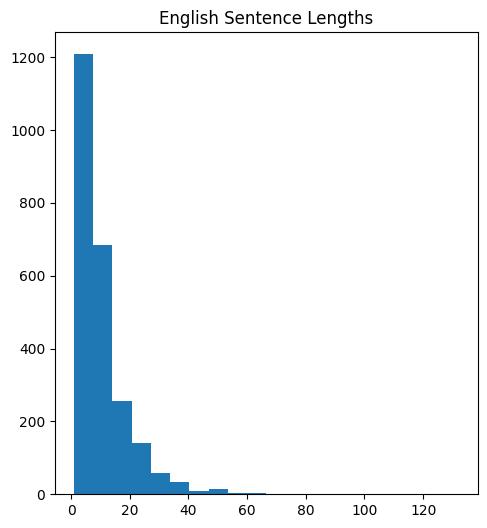

In [ ]:
import matplotlib.pyplot as plt

df_final['eng_length'] = df_final['English'].apply(lambda x: len(x.split()))
df_final['rus_length'] = df_final['Russian'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_final['eng_length'], bins=20)
plt.title('English Sentence Lengths')

*   #### Importing 'Counters' from 'collections' to count the number of most common words in Englinsh ans Russian.
*   #### Importing 'seaborn' from the Matplotlib in order to get the better visualization of graphs. There are visualization libraries like 'bokeh', 'plotly, 'pygal' etc. We are using seaborn instead of any other visualization libraries as it is easy to uses since it takes less lines of code.
*   #### The graphs shown belows shows the most common words in the script in the respective languages.
*   #### **x-axis** represents the ***Frequency*** ranging from '0-800' for ***English*** language and '0-600' in ***Russian*** language.
*   #### **y-axis** represents the 10 most common words the respective language.

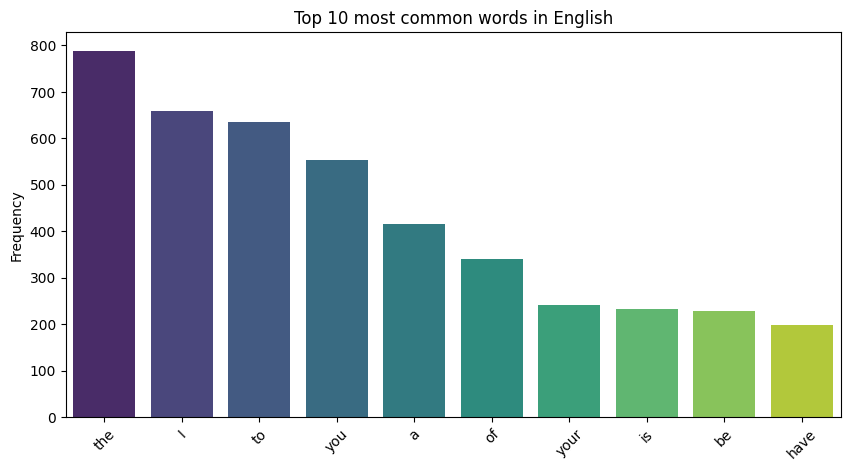

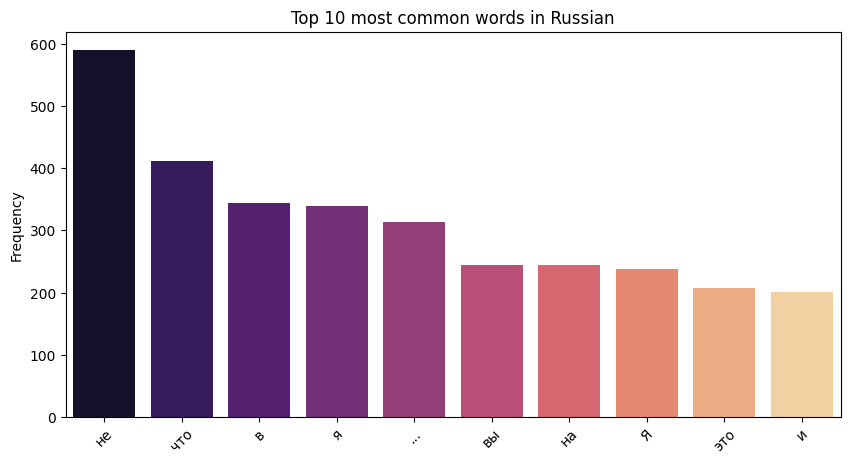

In [ ]:
from collections import Counter
import seaborn as sns

# Getting the top 10 most common words for each language
top_eng_words = dict(Counter(" ".join(df_final['English']).split()).most_common(10))
top_rus_words = dict(Counter(" ".join(df_final['Russian']).split()).most_common(10))

# Plotting for English
plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_eng_words.keys()), y=list(top_eng_words.values()), palette='viridis')
plt.title('Top 10 most common words in English')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plotting for Russian
plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_rus_words.keys()), y=list(top_rus_words.values()), palette='magma')
plt.title('Top 10 most common words in Russian')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Importing the WordCloud library in order.
*   #### We are using the **WordCloud** library, since it is used to generate cloud(or we can say an image) based on the frequency of the words.
*   #### Here we are generating the WordCloud each of the languages, i.e., *English* and *Russian*.
*   #### In WordClooud the size,

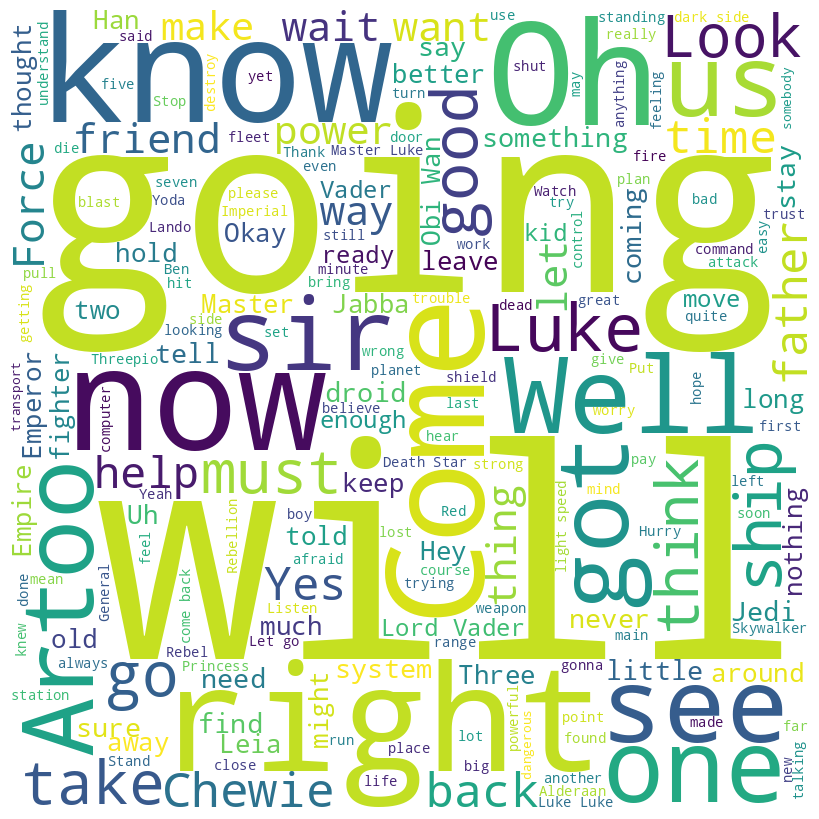

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800,
              background_color ='white',
              stopwords = None,
              min_font_size = 10).generate(' '.join(df_final['English']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


*   #### WordCloud for Russian Language.

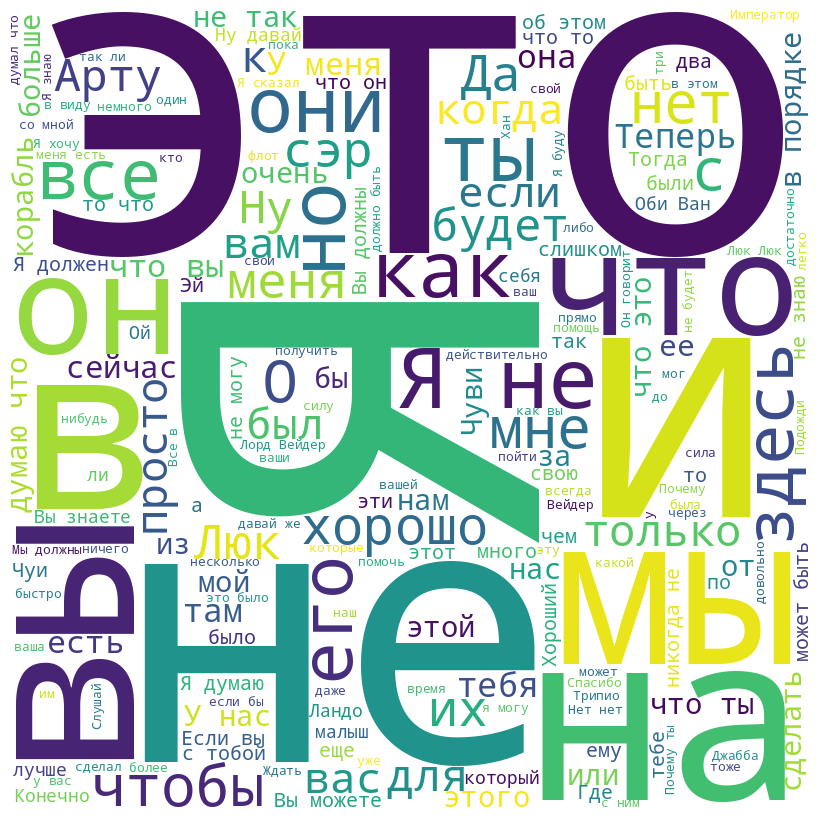

In [ ]:
wordcloud_R = WordCloud(width = 800, height = 800,
              background_color ='white',
              stopwords = None,
              min_font_size = 10).generate(' '.join(df_final['Russian']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_R)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



---



---


# ***Modeling***

---





*   #### Now since we have the insight information about our data and we have preprocessed the data as well by removing the null values, duplicates.
*   #### We are now ready for spliting the data, then we must train the model and test it.

# Loading Libraries

In [ ]:
import torch
from torch.utils.data import Dataset
from transformers import MarianMTModel, MarianTokenizer, Seq2SeqTrainingArguments, Seq2SeqTrainer
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
'''!pip install torch
!pip install sentencepiece
!pip install transformers
!pip install accelerate -U
!pip install transformers[torch]
!pip install sacremoses'''

'!pip install torch\n!pip install sentencepiece\n!pip install transformers\n!pip install accelerate -U\n!pip install transformers[torch]\n!pip install sacremoses'

# Preprocessing the data

*    #### Add a prefix "translate English to Russian: " to each English sentence.
*    #### This is often done in sequence-to-sequence tasks to provide the model with context about the task it needs to perform.

In [ ]:
# Preprocessing
df_final['input_text'] = "translate English to Russian: " + df_final['English']
df_final['target_text'] = df_final['Russian']

## Spliting data
*    #### Since we have mentioned the test_size as ***0.1***.
*    #### We are spliting the DataFrame into the ratio of (train, test) as (90, 10) consdering 100% of data.


In [ ]:
# Split the data
train_df, val_df = train_test_split(df_final, test_size=0.1)

## Loading Tokenizer and Model
*    #### As mentioned in the task, we have use already developed model and enhance its capabilities.
*    #### So for this we are using ***Helsinki_NLP/opus-mt-en-ru*** model from *'Huggingface'*.

In [ ]:
# Load tokenizer and model
model_name = "Helsinki-NLP/opus-mt-en-ru"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)


*    #### As humans we know the data in our dataframe is in the form of strigns.
*    #### But machine doesn't know this. So, We need to use the ***'.astype(str)'*** method in order to make sure that the data/text in our dataframe is in the form of string.

In [ ]:
# Ensure the text columns are of string type
train_df['input_text'] = train_df['input_text'].astype(str)
train_df['target_text'] = train_df['target_text'].astype(str)
val_df['input_text'] = val_df['input_text'].astype(str)
val_df['target_text'] = val_df['target_text'].astype(str)

*    #### Now after confirming the data type of our data in DataFrame, we must verify that there is no NaN values in there.

In [ ]:
# Check for NaN values and handle them
train_df = train_df.dropna(subset=['input_text', 'target_text'])
val_df = val_df.dropna(subset=['input_text', 'target_text'])

*    #### Tokenizing the data makes it easy for machine to understand and work on.
*    #### Tokens are the words in context of NLP. Tokenization is spliting the sentence into individual words.


*    #### Here we need to the *'padding'*, as words are of different lenghts. So it's always better to give padding as it makes sure that all the words are of same length.
*    #### We are also doing the *'truncation'* , which helps us to make sure that there is no extra padding. Consider there is a word of lenght 5 character and other word of length 10 characters. So, by using padding and trunction, we make sure that the length of both the words is 10 characters.

## Creating a Custom dataset class

*    #### We need to create a custon dataset class.
*    #### class TranslationDataset(Dataset): Defines a custom dataset class that inherits from PyTorch’s Dataset class.
*    #### In the __init__ method, the dataset prepares the input data and labels for the model. It tokenizes the text and converts it into tensors.
*    #### __len__ returns the size of the dataset.
*    #### __getitem__ retrieves an item by index from the dataset.

In [ ]:
# PyTorch Dataset
class TranslationDataset(Dataset):
    def __init__(self, tokenizer, df, max_length=512):
        self.input_ids = []
        self.attn_masks = []
        self.labels = []

        for _, row in df.iterrows():
            input_text = row['input_text']
            target_text = row['target_text']

            # Tokenize inputs and targets
            input = tokenizer.encode_plus(input_text, max_length=max_length, return_tensors="pt", padding="max_length", truncation=True)
            target = tokenizer.encode_plus(target_text, max_length=max_length, return_tensors="pt", padding="max_length", truncation=True)

            self.input_ids.append(input['input_ids'].flatten())
            self.attn_masks.append(input['attention_mask'].flatten())
            self.labels.append(target['input_ids'].flatten())

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, index):
        return {
            'input_ids': self.input_ids[index],
            'attention_mask': self.attn_masks[index],
            'labels': self.labels[index]
        }

# Preparing Datasets

In [ ]:
# Create datasets
train_dataset = TranslationDataset(tokenizer, train_df)
val_dataset = TranslationDataset(tokenizer, val_df)

## Define Training Arguments:
*    #### ***output_dir***: It's a user defined directory for storing the results.
*    #### ***evaluation_strategy***: For this model we are using the 'epoch' evaluation strategy.
*    #### ***learning_rate***: It's hyper-parameter that cetermines how much an updating step influences the current value of the weights. So, here 2e-5 means *0.00005*.
*    #### ***per_device_train_batch***: It's a hyperparameter that tells us the number of training sample model works through before updating the internal model parameters.
*    #### ***per_device_eval_batch***: It's a hyperparameter that tells us the number of evaluations sample model works through before updating the internal model parameters.
*    #### ***num_train_epochs***: It tells us how many times we need to run our model.
*    #### ***weight_decay***: It's an additional term in the weight update rule that causes the weights to exponentially decay to zero, if no other update is scheduled

In [ ]:
# Define training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=1e-3,  # Reduced learning rate
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,  # Increased number of epochs
    weight_decay=0.01,
    logging_dir='./logs',  # Directory for storing logs
    logging_steps=10,  # Log every 10 steps
)

# Initializing Trainer

In [ ]:
# Initialize trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

In [ ]:
# Fine-tune the model
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.382600,0.386499
2,0.321800,0.397705
3,0.393400,0.406409
4,0.441800,0.698197
5,0.415400,0.865298


TrainOutput(global_step=2725, training_loss=0.39870344673821684, metrics={'train_runtime': 391.5963, 'train_samples_per_second': 27.822, 'train_steps_per_second': 6.959, 'total_flos': 1477290743562240.0, 'train_loss': 0.39870344673821684, 'epoch': 5.0})

---


# Model Evaluation

---




*    #### For model evaluation we are using BLEU score method instead ROGUE.
*    #### Imports the corpus_bleu function from NLTK, a popular library for natural language processing. corpus_bleu is used to calculate the BLEU score, a standard metric for evaluating machine translation quality.
*    #### **BLEU**: **B**i**L**ingual **E**valuation **U**nderstudy, is a metric for automatically evaluating machine-translated text.


## How BLEU scoring works?
*   #### BLEU score measures the similarity between the machine-translated text and the reference translations using n-grams, which are contiguous(next or together in sequence) sequences of n words. The most common n-grams used are unigrams (single words), bigrams (two-word sequences), trigrams (three-word sequences), and so on.

*   #### It calculates the precision of n-grams in the machine-generated translation by comparing them to the reference translations. The precision is then modified by a brevity penalty to account for translations that are shorter than the reference translations.
*   #### The formula for BLEU score is as follows:

           BLEU = BP * exp(∑pn)

      *   **BP** (Brevity Penalty) is a penalty term that adjusts the score for translations that are shorter than the reference translations, where **reference_length** is the total number of words in the reference translations, and **translated_length** is the total number of words in the machine-generated translation.
      *    ***BP = min(1, (reference_length / translated_length))***

      *   **pn** is the precision of n-grams, which is calculated as the number of n-grams that appear in both the machine-generated translation and the reference translations divided by the total number of n-grams in the machine-generated translation.
      


*    #### The BLEU score measures the similarity of the machine-translated text to a set of high quality reference translations.
*    #### A value of 0 means that the machine-translated output has no overlap with the reference translation (low quality) while a value of 1 means there is perfect overlap with the reference translations (high quality).

# BERT model

*   #### **BERT**: **B**idirectional **E**ncoder **R**epresentations from **T**ransformers, it's developed by the Google.
*   #### BERT converts words into numbers. This process is important because machine learning models use numbers, not words, as inputs. This allows you to train machine learning models on your textual data. That is, BERT models are used to transform your text data to then be used with other types of data for making predictions in a ML model.


In [ ]:
from nltk.translate.bleu_score import corpus_bleu
import torch

# Function to translate the input text using the model
def translate(model, tokenizer, text, max_length=512):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        # Encode the input text
        encoded_text = tokenizer.encode_plus(text, return_tensors="pt", max_length=max_length, truncation=True, padding="max_length").to(model.device)
        # Generate translation using the model
        output = model.generate(encoded_text['input_ids'], attention_mask=encoded_text['attention_mask'], max_length=max_length)
        # Decode the model output into text
        translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Move the model to the appropriate device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Evaluate the model on the validation dataset
references = []
candidates = []

for _, row in val_df.iterrows():
    input_text = row['input_text']
    target_text = row['target_text']

    # Translate the text
    translated_text = translate(model, tokenizer, input_text)

    # Prepare references and candidates for BLEU
    references.append([target_text.split()])
    candidates.append(translated_text.split())

# Calculate BLEU score
bleu_score = corpus_bleu(references, candidates)
print(f'BLEU score on the validation set: {bleu_score}')


KeyboardInterrupt: ignored

# BART model

*   #### **BART**: **B**iderectional and **A**uto-**R**egressive **T**ransformers, it's kind of combination of Google's **BERT** and OpenAI's **GPT**.
*   #### BERT’s bidirectional and autoencoder nature helps in downstream tasks that require information about the whole input sequence. But it is not good for sequence generation tasks.
*   #### GPT models are good at text generation but not good at downstream tasks that require knowledge of whole sequence.
*   #### This is due to its unidirectional and autoregressive nature. BART combines the approaches of both models and thus is the best of both worlds.



In [ ]:
import torch
from torch.utils.data import Dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data
train_df, val_df = train_test_split(df_final, test_size=0.1)

# Load tokenizer and model
model_name = "facebook/bart-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Create datasets
train_dataset = TranslationDataset(tokenizer, train_df)
val_dataset = TranslationDataset(tokenizer, val_df)

# Define training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=1e-3,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    num_train_epochs=3,
    weight_decay=0.01,
    gradient_accumulation_steps=2,
    fp16=True
)

# Initialize trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Fine-tune the model
trainer.train()

Epoch,Training Loss,Validation Loss
1,1.298100,4.757720
2,0.705700,5.040112
3,0.677400,6.431715


TrainOutput(global_step=1635, training_loss=0.8729424946169605, metrics={'train_runtime': 683.1009, 'train_samples_per_second': 9.57, 'train_steps_per_second': 2.393, 'total_flos': 7083181392003072.0, 'train_loss': 0.8729424946169605, 'epoch': 3.0})

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
import torch

# Make sure the model is in evaluation mode
model.eval()

# Function to translate the input text using the model
def translate(input_text):
    model.to("cpu")  # Ensure the model is on the right device
    with torch.no_grad():
        # Encode the input text and generate translation
        inputs = tokenizer.encode_plus(input_text, return_tensors="pt", max_length=300, truncation=True, padding="max_length")
        outputs = model.generate(inputs['input_ids'], attention_mask=inputs['attention_mask'], max_length=300)
        translated = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return translated

# Move the model to the appropriate device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Lists to store original, translated, and expected texts
original_texts = []
translated_texts = []
expected_texts = []

# Calculate BLEU scores for each sentence
bleu_scores = []

for _, row in val_df.iterrows():
    original = row['English']
    expected = row['Russian']
    translated = translate("translate English to Russian: " + original)

    # Compute BLEU score for the current translation
    reference = [expected.split()]
    candidate = translated.split()
    bleu_score = sentence_bleu(reference, candidate)

    # Append to lists
    original_texts.append(original)
    translated_texts.append(translated)
    expected_texts.append(expected)
    bleu_scores.append(bleu_score)


In [ ]:
# Displaying results
for i in range(5):
    print(f"Original: {original_texts[i]}")
    print(f"Translated: {translated_texts[i]}")
    print(f"Expected: {expected_texts[i]}")
    print(f"BLEU Score: {bleu_scores[i]}")
    print('-' * 50)

# Overall BLEU score for the dataset
overall_bleu = sum(bleu_scores) / len(bleu_scores)
print(f'Overall BLEU score on the validation set: {overall_bleu}')

# T5 Model
*   #### **T5**: **T**ext-**T**o-**T**ext **T**reansfer **T**ransformer, it's based on the orginal concept of transformers proposed by the *Vaswani et al*.
*   #### Encoders and Decoders both consits of 12 blocks.
*   #### This model is quite interesting as it has a 220 millions of parameters 😲.
*   #### To train the model, there is a combination of model and data parallelism used. The same technique of unsupervised pre-training and supervised fine-tuning is used.

# Why T5 model is better than the ***BERT*** or ***BART*** ?????

*   #### In the case of BERT, the model is trained to predict one word for the corresponding mask.
*   #### But T5 is hybrid. It is trained to output one word or multiple words for one mask. This allows the model to be flexible in learning the language structure.

In [ ]:
import torch
from torch.utils.data import Dataset
from transformers import T5ForConditionalGeneration, T5Tokenizer, Seq2SeqTrainingArguments, Seq2SeqTrainer
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data
train_df, val_df = train_test_split(df_final, test_size=0.1)

# Load T5 tokenizer and model
model_name = "t5-small"  # You can choose other versions of T5 like 't5-base' or 't5-large'
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# PyTorch Dataset adapted for T5
class T5TranslationDataset(Dataset):
    def __init__(self, tokenizer, df, max_length=512):
        self.input_ids = []
        self.attn_masks = []
        self.labels = []

        for _, row in df.iterrows():
            input_text = row['input_text']
            target_text = row['target_text']

            # Tokenize inputs and targets for T5
            input = tokenizer.encode_plus(input_text, max_length=max_length, return_tensors="pt", padding="max_length", truncation=True)
            target = tokenizer.encode_plus(target_text, max_length=max_length, return_tensors="pt", padding="max_length", truncation=True)

            self.input_ids.append(input['input_ids'].flatten())
            self.attn_masks.append(input['attention_mask'].flatten())
            self.labels.append(target['input_ids'].flatten())

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, index):
        return {
            'input_ids': self.input_ids[index],
            'attention_mask': self.attn_masks[index],
            'labels': self.labels[index]
        }

# Create datasets
train_dataset = T5TranslationDataset(tokenizer, train_df)
val_dataset = T5TranslationDataset(tokenizer, val_df)

# Define training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=3e-4,  # Adjust as needed
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,  # Adjust as needed
    weight_decay=0.01
)

# Initialize trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Fine-tune the T5 model
trainer.train()


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Epoch,Training Loss,Validation Loss
1,0.348200,0.164013
2,0.173700,0.142717
3,0.159000,0.130075
4,0.144200,0.123150
5,0.133300,0.120793


TrainOutput(global_step=2725, training_loss=0.18679635844099413, metrics={'train_runtime': 253.951, 'train_samples_per_second': 42.902, 'train_steps_per_second': 10.73, 'total_flos': 1474548927037440.0, 'train_loss': 0.18679635844099413, 'epoch': 5.0})

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
import torch

# Make sure the model is in evaluation mode
model.eval()

# Function to translate the input text using the model
def translate(input_text):
    model.to('cpu')  # Ensure the model is on the right device
    with torch.no_grad():
        # Encode the input text and generate translation
        inputs = tokenizer.encode_plus(input_text, return_tensors="pt", max_length=512, truncation=True, padding="max_length")
        outputs = model.generate(inputs['input_ids'], attention_mask=inputs['attention_mask'], max_length=512)
        translated = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return translated


# Lists to store original, translated, and expected texts
original_texts = []
translated_texts = []
expected_texts = []

# Calculate BLEU scores for each sentence
bleu_scores = []

for _, row in val_df.iterrows():
    original = row['English']
    expected = row['Russian']
    translated = translate("translate English to Russian: " + original)

    # Compute BLEU score for the current translation
    reference = [expected.split()]
    candidate = translated.split()
    bleu_score = sentence_bleu(reference, candidate)

    # Append to lists
    original_texts.append(original)
    translated_texts.append(translated)
    expected_texts.append(expected)
    bleu_scores.append(bleu_score)



/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [ ]:
# Displaying results
for i in range(5):
    print(f"Original: {original_texts[i]}")
    print(f"Translated: {translated_texts[i]}")
    print(f"Expected: {expected_texts[i]}")
    print(f"BLEU Score: {bleu_scores[i]}")
    print('-' * 50)

# Overall BLEU score for the dataset
overall_bleu = sum(bleu_scores) / len(bleu_scores)
print(f'Overall BLEU score on the validation set: {overall_bleu}')

Original: Obi-Wan is here.  The Force is with him.
Translated: и-ан дес.ере и нем.
Expected: Оби-Ван здесь.Сила с ним.
BLEU Score: 0
--------------------------------------------------
Original: Come on, Chewie!
Translated: ава, уви!
Expected: Давай, Чуви!
BLEU Score: 0
--------------------------------------------------
Original: Stay on target!
Translated: ставас на тоо!
Expected: Оставайся на цели!
BLEU Score: 1.384292958842266e-231
--------------------------------------------------
Original: If they traced the robots here, they may have learned who they sold them to.  And that would lead them back home!
Translated: сли они рити и дес аи, они моли нал, которе оут и оут. то аудет и оут на удет!
Expected: Если они проследили роботов здесь, они, возможно, узнали, кому их продали.И это приведет их домой!
BLEU Score: 8.726094729337945e-232
--------------------------------------------------
Original: Governor Tarkin, we have an emergency alert in detention block AA-twenty-three.
Translated: